# Experiment 1 - Common use case, optimizing N threads

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
folder_path1    = 'results/convergence_test_investigation/'
number_of_tests = 84

Set files to read

In [3]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [4]:
data = []
        
fetch_data(folder_path1, file_names, data, ["Runtime"])
        
dataset = []

power = 10
num_workers = 4
convergence = False

for i in range(len(data)):
    dataset.append([2 ** power, num_workers, data[i].mean()[0], convergence])
    
    if num_workers == 32:
        if power == 15:
            convergence = True
            num_workers = 4
            power = 10
        else:
            num_workers = 4
            power = power + 1
    else:
        num_workers = num_workers + 4

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Num Workers", "Time", "Convergence Test"]

conv_false = dataset.loc[dataset['Convergence Test'] == False]
conv_true  = dataset.loc[dataset['Convergence Test'] == True]

dataset

,Grid Size,Num Workers,Time,Convergence Test
0,1024,4,3.2,False
1,1024,8,3.2,False
2,1024,12,3.8,False
3,1024,16,3.4,False
4,1024,20,3.8,False
5,1024,24,4.6,False
6,1024,28,5.4,False
7,1024,32,9.0,False
8,2048,4,6.8,False
9,2048,8,6.8,False


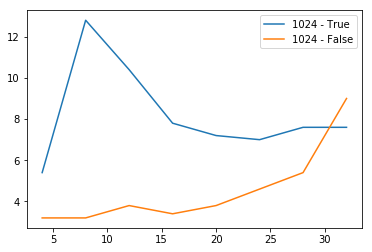

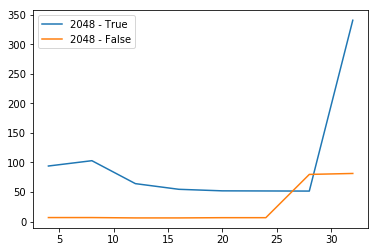

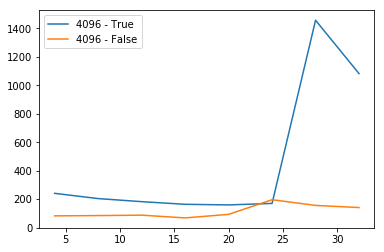

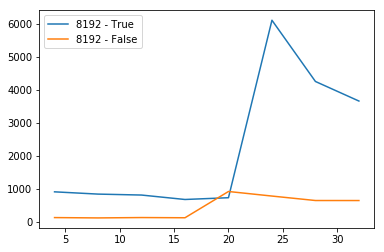

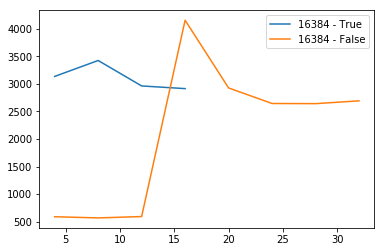

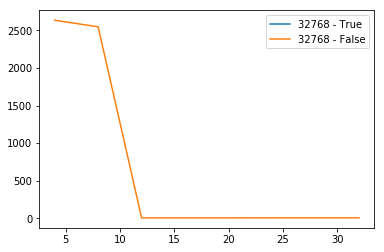

In [5]:
for i in range(0, 6):
    test = conv_true.loc[conv_true['Grid Size'] == 2 ** (10 + i)]
    plt.plot(test["Num Workers"], test["Time"], label=str(2 ** (10 + i)) + " - True")
    test = conv_false.loc[conv_false['Grid Size'] == 2 ** (10 + i)]
    plt.plot(test["Num Workers"], test["Time"], label=str(2 ** (10 + i)) + " - False")
    plt.legend(loc='best')
    plt.savefig("graphs/convergence_test/" + str(2 ** (10 + i)) + ".png")
    plt.show()